# Assignment 4
 
Boston Housing Dataset
Predicting Median value of owner-occupied homes
The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. There are 14 attributes in each case of the dataset. They are:



1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in \$1000's


## Aim
To implement a linear regression with regularization via gradient descent.
to implement gradient descent with Lp norm, for 3 different values of p in (1,2]
To contrast the difference between performance of linear regression Lp norm and L2 norm for these 3 different values.
Tally that the gradient descent for L2 gives same result as matrix inversion based solution.

## Working of Code
NumPy library would be required, so code begins by importing it.
Import phi and phi_test from train and test datasets using NumPy's loadtxt function.
Import y from train dataset using the loadtxt function.
Concatenate coloumn of 1s to right of phi and phi_test.
Apply min max scaling on each coloumn of phi and phi_test
Apply log scaling on y.
Define a function to calculate change in error function based on phi, w and p norm.
Make a dictionary containing filenames as keys and p as values
For each item in this dictionary
    

*   Set the w to all 0s
*   Set an appropriate value for lambda and step size .
*   Calculate new value of w.
*   Repeat steps until error between consecutive ws is less than threshold
*   Load values of id from test data file.
*   Calculate y for test data using phi test and applying inverse log
*   Save the ids and y according to filename from dictionary.





In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df_train = pd.read_csv('train.csv')
X_train = df_train.iloc[:,1:-1]
df_test = pd.read_csv('test.csv')
X_test = df_test.iloc[:,1:]

In [29]:
X_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59
3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59
4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09


In [30]:
X_test.shape

(105, 13)

In [31]:
X_train.shape

(400, 13)

In [32]:
y_train = X_train.iloc[:,-1]

In [33]:
y_train.head(5)

0    17.28
1     6.21
2     4.59
3    16.59
4     9.09
Name: LSTAT, dtype: float64

In [34]:
y_train.shape

(400,)

## EDA 

In [35]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 4.8 MB/s 


#### phi*k* correlation matrix

In [36]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [37]:
phik_overview = X_train.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,0.00,0.52,0.00,0.60,0.38,0.14,0.29,0.48,0.47,0.24,0.57,0.49
ZN,0.00,1.00,0.59,0.00,0.58,0.41,0.68,0.81,0.62,0.51,0.71,0.00,0.41
INDUS,0.52,0.59,1.00,0.16,0.88,0.37,0.52,0.62,0.78,0.83,0.74,0.34,0.50
CHAS,0.00,0.00,0.16,1.00,0.13,0.15,0.00,0.12,0.06,0.12,0.22,0.02,0.11
NOX,0.60,0.58,0.88,0.13,1.00,0.39,0.58,0.67,0.68,0.76,0.69,0.44,0.53
RM,0.38,0.41,0.37,0.15,0.39,1.00,0.28,0.30,0.44,0.24,0.57,0.16,0.75
AGE,0.14,0.68,0.52,0.00,0.58,0.28,1.00,0.74,0.58,0.48,0.64,0.00,0.62
DIS,0.29,0.81,0.62,0.12,0.67,0.30,0.74,1.00,0.69,0.62,0.71,0.08,0.54
RAD,0.48,0.62,0.78,0.06,0.68,0.44,0.58,0.69,1.00,0.70,0.84,0.40,0.58
TAX,0.47,0.51,0.83,0.12,0.76,0.24,0.48,0.62,0.70,1.00,0.71,0.37,0.44


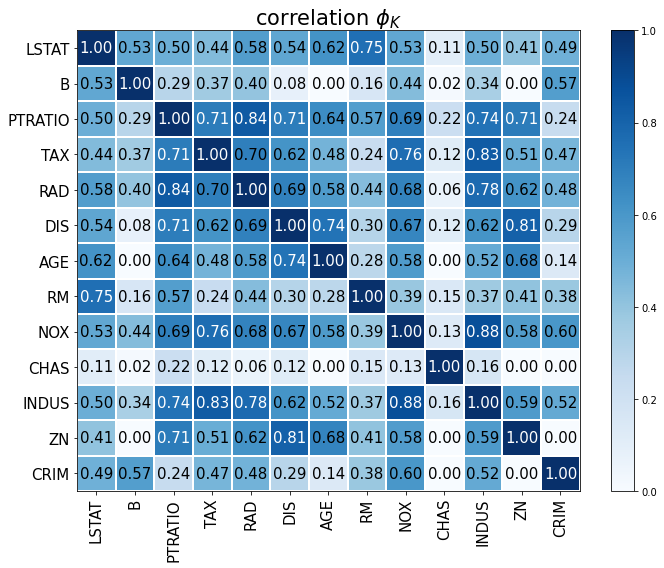

In [38]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.columns, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

We can clearly see some correlation among the variables such as TAX and PTRATIO(0.71), RAD and PTRATIO (0.84), RAD and INDUS (0.78), INDUS AND NOX (0.88), INDUS and DIS etc.

###  Significance of the correlation :

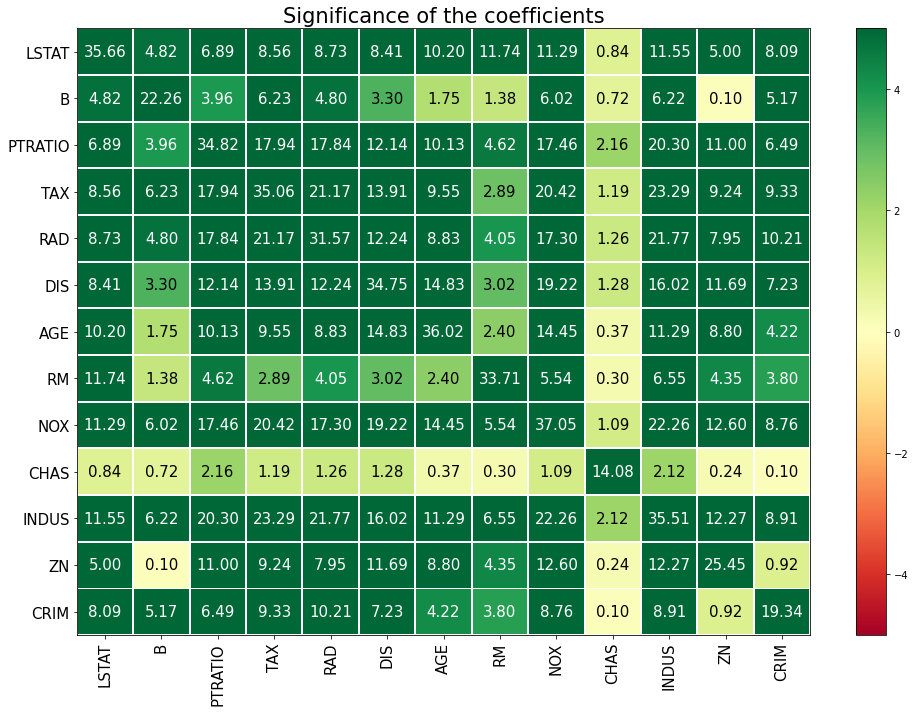

In [39]:
significance_overview = X_train.significance_matrix(interval_cols=df_train.columns)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

#### Global correlation
The global correlation coefficient is a useful measure expressing the total correlation of one variable to all other variables in the dataset. This gives us an indication of how well one variable can be modeled using the other variables.

/usr/local/lib/python3.7/dist-packages/phik/phik.py:320: RuntimeWarning: invalid value encountered in sqrt
  1 - (1 / (np.diagonal(V) * np.diagonal(Vinv)))


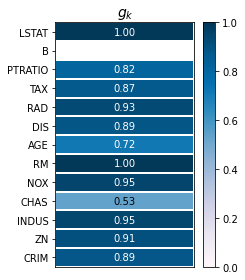

In [40]:
global_correlation, global_labels = X_train.global_phik(interval_cols=df_train.columns)

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="PuBu", title=r"$g_k$",
                        fontsize_factor=1.0)
plt.tight_layout()

**NOTE ** - By Global correlation plots we can clearly see LSTAT AND RM can easily be representated by other features in dataset. RAD, NOX, INDUS, ZN also have high correlation with other features.

### Feature Scaling - MinMaxScalar via Pipeline
Columns of phi are not in same range, this is because their units are different i.e phi is ill conditioned
So, min max scaling for each column is applied to bring them in range 0-1
Same scaling would be required on columns of phi test.
Log scaling was used on y. This was determined by trial and error.
Following steps are baed on hints provided .

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [43]:
scalar = MinMaxScaler()
reg = LinearRegression()
# prepare the model with input scaling
pipeline = Pipeline(steps=[('standard_scalar',scalar), ('Regressor', reg)])

# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=None,  func=np.log, inverse_func=np.exp)
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = np.absolute(scores)
# summarize the result
s_mean = np.mean(scores)

In [44]:
#Mean over cross folds Mean absolute error 
print(f'Mean MEA :', s_mean)

Mean MEA : 1.7266817931363065


###  Try Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.33) #changing value of alpha to 0.33 based on best_scores obtained at alpha =0.33 in RidgeCV
# prepare the model with input scaling
pipeline = Pipeline(steps=[('standard_scalar',scalar), ('Regressor', reg)])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=None,  func=np.log, inverse_func=np.exp)
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = np.absolute(scores)
# summarize the result
s_mean = np.mean(scores)
#reg.coef_
#reg.intercept_

In [46]:
print(f'Mean MEA :', s_mean)

Mean MEA : 1.6372232526332913


In [47]:
# Ridge regression with minimum Mean MAE, will be used to make predictions 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

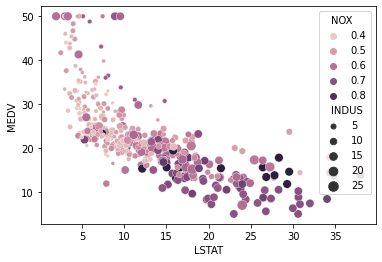

In [48]:
# Plotting
import seaborn as sns
sns.scatterplot(data = df_train,x="LSTAT", y="MEDV", hue="NOX",size = 'INDUS',sizes=(10, 100))

Attribute Info:


*   INDUS:proportion of non-retail business acres per town
*   NOX: nitric oxides concentration (parts per 10 million)
*  LSTAT : % lower status of the population
*  MEDV : Median value of owner-occupied homes in $1000's

Here based on the importance of variables contributing to median value of occupied homes we have ploted it against LSTAT - % of low status of the population, with more dimensions added by color - NOX concentration and size of marker - INDUS, proportion of non retail business. 


In [49]:
output_df = X_test
output_df['Predicted MEDV'] = np.around(y_pred,decimals =1)

In [50]:
output_df.to_csv('output.csv')

##### Finding the optimal value of complexity parameter alpha in Ridge Regression.


In [51]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(alphas=np.logspace(-3, 0, 26), scoring ='neg_mean_absolute_error',cv =cv )
# prepare the model with input scaling
pipeline = Pipeline(steps=[('standard_scalar',scalar), ('Regressor', reg)])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=None,  func=np.log, inverse_func=np.exp)
model.fit(X_train,y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('standard_scalar',
                                                      MinMaxScaler()),
                                                     ('Regressor',
                                                      RidgeCV(alphas=array([0.001     , 0.00131826, 0.0017378 , 0.00229087, 0.00301995,
       0.00398107, 0.00524807, 0.00691831, 0.00912011, 0.01202264,
       0.01584893, 0.02089296, 0.02754229, 0.03630781, 0.04786301,
       0.06309573, 0.08317638, 0.10964782, 0.14454398, 0.19054607,
       0.25118864, 0.33113112, 0.43651583, 0.57543994, 0.75857758,
       1.        ]),
                                                              cv=KFold(n_splits=10, random_state=1, shuffle=True),
                                                              scoring='neg_mean_absolute_error'))]))

In [52]:
# Best score of mean absolute error
model.regressor_.named_steps['Regressor'].best_score_

-0.12495431029909518

In [53]:
# Best alpha
model.regressor_.named_steps['Regressor'].alpha_

0.3311311214825911

### Try Lasso Regression

In [54]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [55]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.001) #obtained via LassoCV
# prepare the model with input scaling
pipeline = Pipeline(steps=[('standard_scalar',scalar),# Feature_Scaling
                           ('Regressor', reg)])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=None,  func=np.log, inverse_func=np.exp)
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = np.absolute(scores)
# summarize the result
s_mean = np.mean(scores)

In [56]:
print(f'Mean MEA :', s_mean)

Mean MEA : 1.7266297659119245


##### Hyperparameter optimization for alpha in Lasso Regression

In [57]:
from sklearn.linear_model import LassoCV
reg = LassoCV(alphas=np.logspace(-3, 0, 26),cv =cv )
# prepare the model with input scaling
pipeline = Pipeline(steps=[('standard_scalar',scalar), ('Regressor', reg)])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=None,  func=np.log, inverse_func=np.exp)
model.fit(X_train,y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('standard_scalar',
                                                      MinMaxScaler()),
                                                     ('Regressor',
                                                      LassoCV(alphas=array([0.001     , 0.00131826, 0.0017378 , 0.00229087, 0.00301995,
       0.00398107, 0.00524807, 0.00691831, 0.00912011, 0.01202264,
       0.01584893, 0.02089296, 0.02754229, 0.03630781, 0.04786301,
       0.06309573, 0.08317638, 0.10964782, 0.14454398, 0.19054607,
       0.25118864, 0.33113112, 0.43651583, 0.57543994, 0.75857758,
       1.        ]),
                                                              cv=KFold(n_splits=10, random_state=1, shuffle=True)))]))

In [58]:
# Best alpha
model.regressor_.named_steps['Regressor'].alpha_

0.001

In [59]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(l1_ratio =0.7,alpha =0.001) #obtained via LassoCV
# prepare the model with input scaling
pipeline = Pipeline(steps=[('standard_scalar',scalar),# Feature_Scaling
                           ('Regressor', reg)])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=None,  func=np.log, inverse_func=np.exp)
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = np.absolute(scores)
# summarize the result
s_mean = np.mean(scores)

In [60]:
print(f'Mean MEA :', s_mean)

Mean MEA : 1.695819058948667


##### Hyperparameter optimization for alpha and l1_ratio in ElasticNet Regression

In [61]:
from sklearn.linear_model import ElasticNetCV
reg = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1],alphas=np.logspace(-3, 0, 26),cv =cv )
# prepare the model with input scaling
pipeline = Pipeline(steps=[('standard_scalar',scalar), ('Regressor', reg)])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=None,  func=np.log, inverse_func=np.exp)
model.fit(X_train,y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('standard_scalar',
                                                      MinMaxScaler()),
                                                     ('Regressor',
                                                      ElasticNetCV(alphas=array([0.001     , 0.00131826, 0.0017378 , 0.00229087, 0.00301995,
       0.00398107, 0.00524807, 0.00691831, 0.00912011, 0.01202264,
       0.01584893, 0.02089296, 0.02754229, 0.03630781, 0.04786301,
       0.06309573, 0.08317638, 0.10964782, 0.14454398, 0.19054607,
       0.25118864, 0.33113112, 0.43651583, 0.57543994, 0.75857758,
       1.        ]),
                                                                   cv=KFold(n_splits=10, random_state=1, shuffle=True),
                                                                   l1_ratio=[0.1,
                                                                             0.5,


In [62]:
# Best l1_ratio
model.regressor_.named_steps['Regressor'].l1_ratio_

0.7

In [63]:
# Best alpha
model.regressor_.named_steps['Regressor'].alpha_

0.001